## Problem statement

Predict the diabetes status of a patient given their health measurements

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Loading dataset
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [2]:
# read the data into a Pandas DataFrame
import pandas as pd
pima = pd.read_csv('diabetes.csv')

In [3]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.shape

(768, 9)

In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# define X and y
X = pima[['Pregnancies','Insulin','BMI','Age']]
y = pima.Outcome

In [7]:
type(X)

pandas.core.frame.DataFrame

# split X and y into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## train a logistic regression model

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Make class predictions for the testing set

In [10]:
y_pred_class = logreg.predict(X_test)

## calculate accuracy

In [11]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


## Null Accuracy

In [19]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [33]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [35]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [34]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [36]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: Outcome, dtype: float64

### confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.<br>
Key matrix elements are:<br>
true positives (TP): These are cases in which we predicted yes (they have the purchased), and they do have the purchases.<br>
true negatives (TN): We predicted no, and they don't have purchased.<br>
false positives (FP): We predicted yes, but they have actually not the purchased. (Also known as a "Type I error.")<br>
false negatives (FN): We predicted no, but they actually ourchased. (Also known as a "Type II error.")<br>

In [22]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[118,  12],
       [ 47,  15]], dtype=int64)

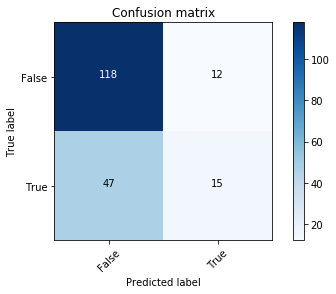

In [25]:
# False=0; True=1
plot_confusion_matrix(cm, classes=['False', 'True'])

In [26]:
# slice confusion matrix into four pieces
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

## Metrics computed from a confusion matrix
- Classification Accuracy <br>
- Classification Error <br>
- Sensitivity <br>
- Specificity <br>


### a-Classification Accuracy 
shows how often is the classifier correct i.e same as accuracy score<br>
%age of correct prediction

In [27]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


### b-Classification Error
how often is the classifier incorrect

In [28]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


### c-Sensitivity
When the actual value is positive, how often is the prediction correct?<br>
How "sensitive" is the classifier to detecting positive instances?<br>
Also known as "True Positive Rate" or "Recall"

In [29]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


### d- Specificity
When the actual value is negative, how often is the prediction correct?<br>
How "specific" (or "selective") is the classifier in predicting positive instances?

In [30]:
print(TN / float(TN + FP))

0.9076923076923077


### e-False Positive Rate <br>
When the actual value is negative, how often is the prediction incorrect?

In [31]:
print(FP / float(TN + FP))

0.09230769230769231


### f-Precision<br> 
When a positive value is predicted, how often is the prediction correct?<br>
How "precise" is the classifier when predicting positive instances?

In [32]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556
